In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('matchtable.csv')

In [3]:
df.head

<bound method NDFrame.head of       int_chllS_1000  int_chllS_300        oc      kd        lat        lon  \
0          18.634841      18.634841  0.268040  0.0528  25.759870 -80.039880   
1          26.339804      26.339804  0.235600  0.0486  25.783750 -80.031720   
2          30.441570      30.441570  0.166175  0.0410  25.808190 -80.023130   
3          27.776776      27.776776  0.149014  0.0370  25.835700 -80.015380   
4          13.253941      13.253941  0.139009  0.0346  25.871000 -80.001070   
...              ...            ...       ...     ...        ...        ...   
5169        5.251709       5.251709  0.765232  0.0912  40.867290 -71.001180   
5170        4.423945       4.423945  0.765232  0.0912  40.867511 -71.000410   
5171        4.270035       4.270035  0.765232  0.0912  40.869021 -70.999932   
5172        4.451968       4.451968  0.835308  0.0964  40.870837 -70.999071   
5173        4.673818       4.673818  0.803958  0.0942  40.877700 -71.003770   

      year  month  mo

In [4]:
y_300=df['int_chllS_300']
y_1000=df['int_chllS_1000']
X=df[['oc','kd','yearday','lat','lon']]


# we will rerun with both start w the deep deep. 
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y_300,test_size=0.2,random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y_1000,test_size=0.2,random_state=4)

len(X_train)

4139

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# For loop to find the best model k
k = []
r2_train = []
r2_test = []
RMSE = []

loops = range(1,31)

for n in loops:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(standardized_X, y_train)

    # Use the model to predict y 
    y_pred = model.predict(standardized_X_test)
    
    # Form our lists to plot
    k.append(n)
    r2_train.append(r2_score(y_train, model.predict(standardized_X)))
    r2_test.append(r2_score(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    


0.6039396990131268
2


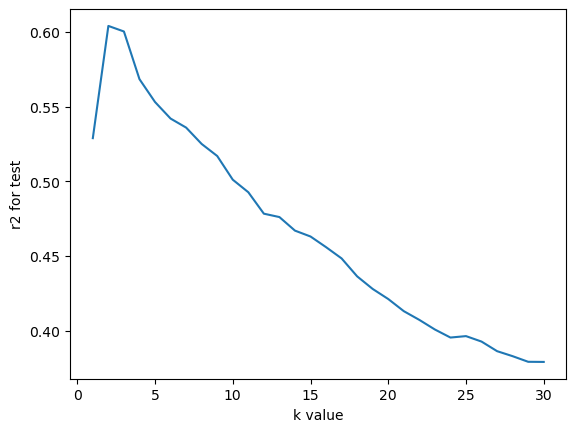

In [32]:
plt.plot(k,r2_test)
plt.xlabel('k value')
plt.ylabel('r2 for test')

print(r2_test[1])
print(k[1])

In [8]:
from sklearn.neural_network import MLPRegressor

In [9]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000,random_state=10)

# now fit the classifer to the training data
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=10)

0.17942013076322372


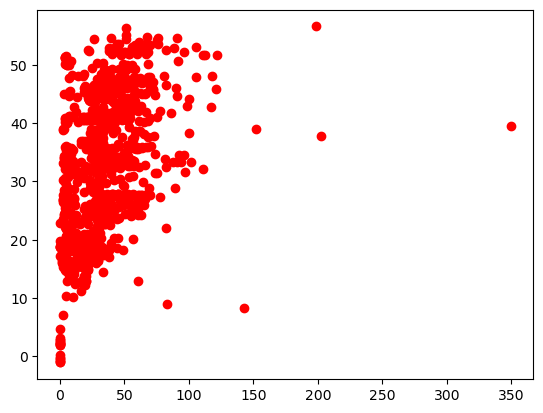

In [10]:
# try makign some predictions using your classifier
predictions = mlp.predict(X_test)

plt.plot(y_test, predictions, 'ro')
print(r2_score(y_test, predictions))

In [20]:
# now build a loop to test how well different number of hidden layers performs
scores = []
scores_list = []
nidx = []

l_range = range(1, 6, 1)
neurons = [2,3,5,7,10]


for l in l_range:
    for neuron in neurons:
        
        print(f"Combination: {l} layers with {neuron} neurons.") 
        model = MLPRegressor(hidden_layer_sizes=(neuron,)*l, random_state=4, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        scores = r2_score(y_test,y_pred)
        scores_list.append(r2_score(y_test,y_pred))
        nidx.append(l+(neuron)/10)) 

Combination: 1 layers with 2 neurons.
Combination: 1 layers with 3 neurons.
Combination: 1 layers with 5 neurons.
Combination: 1 layers with 7 neurons.
Combination: 1 layers with 10 neurons.
Combination: 2 layers with 2 neurons.
Combination: 2 layers with 3 neurons.
Combination: 2 layers with 5 neurons.
Combination: 2 layers with 7 neurons.
Combination: 2 layers with 10 neurons.
Combination: 3 layers with 2 neurons.
Combination: 3 layers with 3 neurons.
Combination: 3 layers with 5 neurons.
Combination: 3 layers with 7 neurons.
Combination: 3 layers with 10 neurons.
Combination: 4 layers with 2 neurons.
Combination: 4 layers with 3 neurons.
Combination: 4 layers with 5 neurons.
Combination: 4 layers with 7 neurons.
Combination: 4 layers with 10 neurons.
Combination: 5 layers with 2 neurons.
Combination: 5 layers with 3 neurons.
Combination: 5 layers with 5 neurons.
Combination: 5 layers with 7 neurons.
Combination: 5 layers with 10 neurons.


[0.02129963380523925, 0.07108426864060935, 0.04338624745208397, 0.056713562542768936, 0.0788398637554335, 0.02079771933658614, 0.07080422471617909, 0.10954667607923796, 0.07480037680223828, 0.16053102766594685, 0.021727428024116868, 0.08145339396676488, 0.16250089249022848, 0.07552275008723264, 0.15928607861714805, 0.019192870807465456, 0.019107828947034555, 0.1401428057494981, 0.05559551485610592, 0.1526140712762274, 0.020425511067120206, 0.01725941210853532, 0.11754023973891825, 0.16240232953547462, 0.16209119434048913]
[1.2, 1.3, 1.5, 1.7, 2.0, 2.2, 2.3, 2.5, 2.7, 3.0, 3.2, 3.3, 3.5, 3.7, 4.0, 4.2, 4.3, 4.5, 4.7, 5.0, 5.2, 5.3, 5.5, 5.7, 6.0]


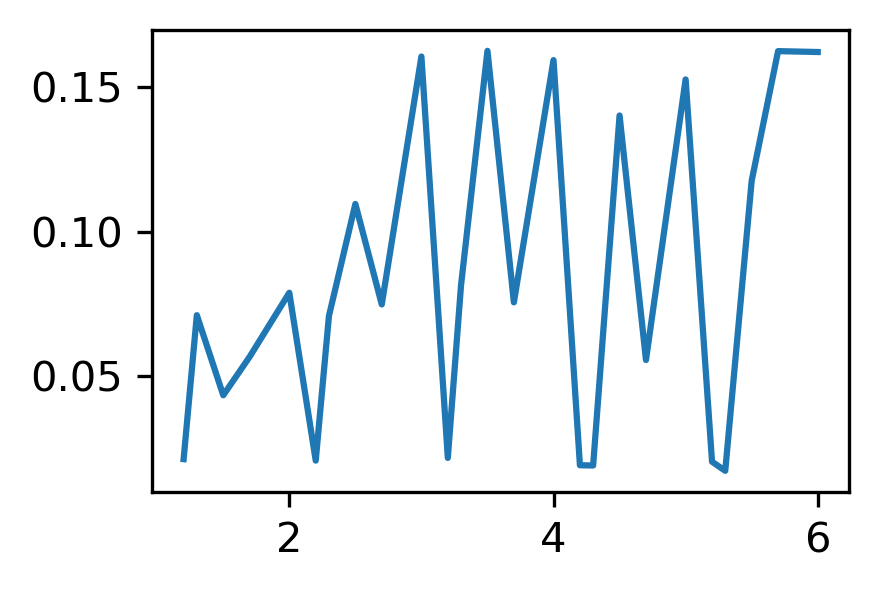

In [23]:
print(scores_list)
print(nidx)
fig = plt.figure(figsize = (3,2), dpi = 300)
plt.plot(nidx,scores_list)